In [2]:
import class_and_functions
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import torch.nn as nn

Epoch 1Finished!
Epoch 2Finished!
Epoch 3Finished!
Epoch 4Finished!
Epoch 5Finished!
Epoch 6Finished!
Epoch 7Finished!
Epoch 8Finished!
Epoch 9Finished!
Epoch 10Finished!
Epoch 11Finished!
Epoch 12Finished!
Epoch 13Finished!
Epoch 14Finished!
Epoch 15Finished!
Epoch 16Finished!
Epoch 17Finished!
Epoch 18Finished!
Epoch 19Finished!
Epoch 20Finished!
Epoch 21Finished!
Epoch 22Finished!
Epoch 23Finished!
Epoch 24Finished!
Epoch 25Finished!
Epoch 26Finished!
Epoch 27Finished!
Epoch 28Finished!
Epoch 29Finished!
Epoch 30Finished!
Epoch 31Finished!
Epoch 32Finished!
Epoch 33Finished!
Epoch 34Finished!
Epoch 35Finished!
Epoch 36Finished!
Epoch 37Finished!
Epoch 38Finished!
Epoch 39Finished!
Epoch 40Finished!
Epoch 41Finished!
Epoch 42Finished!
Epoch 43Finished!
Epoch 44Finished!
Epoch 45Finished!
Epoch 46Finished!
Epoch 47Finished!
Epoch 48Finished!
Epoch 49Finished!
Epoch 50Finished!


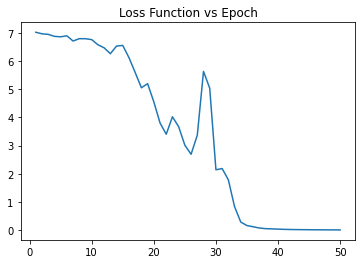

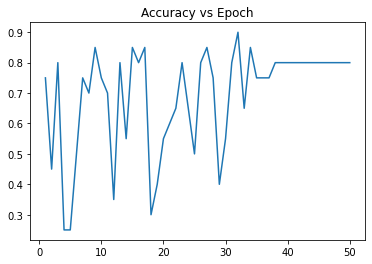

In [3]:
#Dataset Parameters
image_transform = transforms.ToTensor()
stop_dir = './Data/stop/'
not_stop_dir = './Data/not_stop/'
dataset = class_and_functions.stopNotStopData(stop_dir=stop_dir, not_stop_dir=not_stop_dir, transform=image_transform)

#Splitting Dataset into three datasets
fraction_arr = [0.8, 0.1, 0.1] #Fraction of training, validation and test respectively
train_set, valid_set, test_set = class_and_functions.split_dataset(dataset=dataset, fraction_arr=fraction_arr, random_seed=25)

#Select the device
if torch.cuda.is_available():
    device = "cude"
else:
    device = "cpu"

#Create the model
model = class_and_functions.stopNotStop_cnn(out_channel_1=8, out_channel_2=16).to(device)

learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss()

train_dataloader = DataLoader(train_set, batch_size=16 ,shuffle=True)
valid_dataloader = DataLoader(dataset=valid_set, batch_size=len(valid_set), shuffle=True)
N_test = len(valid_set)
n_epochs = 50

#Train the model
model, cost_arr, acc_arr = class_and_functions.train_model(model=model, n_epochs=n_epochs, train_loader=train_dataloader, validation_loader=valid_dataloader, optimizer=optimizer, criterion=criterion, N_test=N_test, device=device)

#Plot Cost and Accuray
plt.plot(range(1,n_epochs+1), cost_arr)
plt.title('Loss Function vs Epoch')
plt.show()

plt.plot(range(1,n_epochs+1), acc_arr)
plt.title('Accuracy vs Epoch')
plt.show()

In [10]:
#Test of saving and loading a model
torch.save(model, './Model/model')

#Test of reading the model
model_load = torch.load('./Model/model')
model_load.eval()

stopNotStop_cnn(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(2, 2), padding=(3, 3))
  (maxpool1): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=21328, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=1, bias=True)
)

torch.Size([1, 3, 946, 1300])


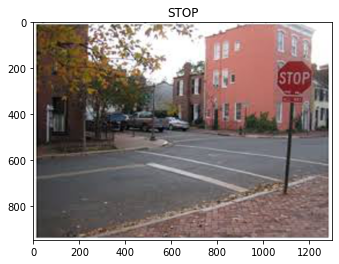

torch.Size([1, 3, 946, 1300])


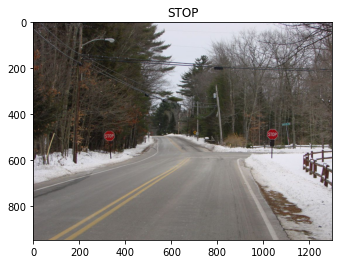

torch.Size([1, 3, 946, 1300])


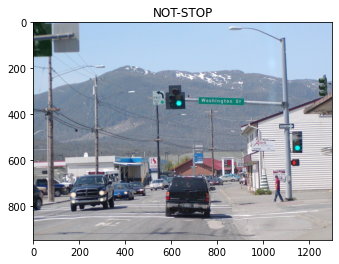

torch.Size([1, 3, 946, 1300])


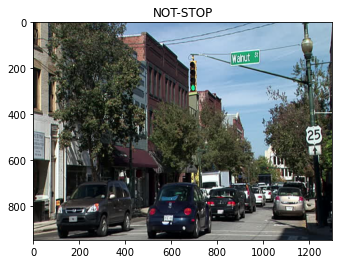

torch.Size([1, 3, 946, 1300])


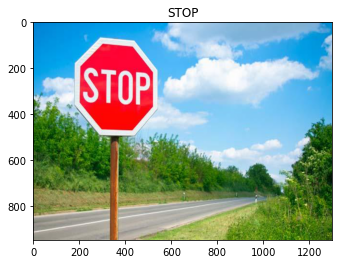

In [18]:
for i in range(5):
    x_test, y_test = test_set[i]
    x_test = torch.unsqueeze(x_test, dim=0)

    #Making prediction
    z = model_load(x_test)

    x_test = torch.squeeze(x_test, dim=0)
    x_test = x_test.moveaxis(0,-1)

    plt.imshow(x_test)
    if z < 0.5:
        plt.title('STOP')
    else:
        plt.title('NOT-STOP')
    plt.show()


In [33]:
import numpy as np

#Dataset Parameters
image_transform = transforms.ToTensor()
stop_dir = './Data/stop/'
not_stop_dir = './Data/not_stop/'
dataset = class_and_functions.stopNotStopData(stop_dir=stop_dir, not_stop_dir=not_stop_dir, transform=image_transform)

#Splitting Dataset into three datasets
fraction_arr = [0.8, 0.1, 0.1] #Fraction of training, validation and test respectively
train_set, valid_set, test_set = class_and_functions.split_dataset(dataset=dataset, fraction_arr=fraction_arr, random_seed=25)

#Select the device
device = "cpu"

#Defining hyperparameter lists to test
lr_list = np.asarray([0.1, 0.01])
n_epochs_list = np.asarray([5, 10]).astype(int)
out_channel_1_list = np.asarray([2, 4]).astype(int)
out_channel_2_list = np.asarray([4, 8]).astype(int)
train_batch_size_list = [16, 32]

best_acc = 0 #Best Accuracy is initially zero

for lr in lr_list:
    for n_epochs in n_epochs_list:
        for out_channel_1 in out_channel_1_list:
            for out_channel_2 in out_channel_2_list:
                for train_batch_size in train_batch_size_list:
                    model = class_and_functions.stopNotStop_cnn(out_channel_1=out_channel_1, out_channel_2=out_channel_2).to(device)

                    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
                    criterion = nn.BCELoss()

                    train_dataloader = DataLoader(dataset=train_set, batch_size=train_batch_size ,shuffle=True)
                    valid_dataloader = DataLoader(dataset=valid_set, batch_size=len(valid_set), shuffle=True)
                    N_test = len(valid_set)
                    model, cost_arr, acc_arr = class_and_functions.train_model(model=model, n_epochs=n_epochs, train_loader=train_dataloader, validation_loader=valid_dataloader, optimizer=optimizer, criterion=criterion, N_test=N_test, device=device)
                    current_acc = acc_arr[-1] #Take final accuracy 
                    print('lr='+str(lr) + ' n_epochs=' + str(n_epochs) + ' out_ch_1=' + str(out_channel_1) + ' out_ch2=' + str(out_channel_2) + ' batch='+str(train_batch_size))
                    print('Accuracy = ' + str(current_acc))

                    if current_acc > best_acc:
                        best_model = model
                        best_acc = current_acc

#Print and save the final model
print('Best Model Accuracy: ' + best_acc)
torch.save(best_model, './Model/best_model_acc'+str(best_acc))

Epoch 1Finished!
Epoch 2Finished!
Epoch 3Finished!
Epoch 4Finished!
Epoch 5Finished!
lr=0.1 n_epochs=5 out_ch_1=2 out_ch2=4 batch=16
Accuracy = 0.25
Epoch 1Finished!
Epoch 2Finished!
Epoch 3Finished!
Epoch 4Finished!
Epoch 5Finished!
lr=0.1 n_epochs=5 out_ch_1=2 out_ch2=4 batch=32
Accuracy = 0.25
Epoch 1Finished!
Epoch 2Finished!
Epoch 3Finished!
Epoch 4Finished!
Epoch 5Finished!
lr=0.1 n_epochs=5 out_ch_1=2 out_ch2=8 batch=16
Accuracy = 0.6
Epoch 1Finished!
Epoch 2Finished!
Epoch 3Finished!
Epoch 4Finished!
Epoch 5Finished!
lr=0.1 n_epochs=5 out_ch_1=2 out_ch2=8 batch=32
Accuracy = 0.25
Epoch 1Finished!
Epoch 2Finished!
Epoch 3Finished!
Epoch 4Finished!
Epoch 5Finished!
lr=0.1 n_epochs=5 out_ch_1=4 out_ch2=4 batch=16
Accuracy = 0.8
Epoch 1Finished!
Epoch 2Finished!
Epoch 3Finished!
Epoch 4Finished!
Epoch 5Finished!
lr=0.1 n_epochs=5 out_ch_1=4 out_ch2=4 batch=32
Accuracy = 0.5
Epoch 1Finished!
Epoch 2Finished!
Epoch 3Finished!
Epoch 4Finished!
Epoch 5Finished!
lr=0.1 n_epochs=5 out_ch

KeyboardInterrupt: 

In [ ]:
print(len(train_set))
print(len(valid_set))
print(len(test_set))

idx = 114
test_x, test_y = train_set[idx]

test_x = torch.movedim(test_x, 0, -1)
plt.imshow(test_x)
plt.title(str(test_y))
plt.show()